### Import the libraries

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Import the dataset

In [53]:
dataset = pd.read_csv(r'C:\Users\jagan\Documents\ML\datasets\3. disease prediction\Training.csv')

In [54]:
dataset = dataset.dropna(axis=1)

In [55]:
dataset.columns

Index(['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing',
       'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity',
       'ulcers_on_tongue',
       ...
       'blackheads', 'scurring', 'skin_peeling', 'silver_like_dusting',
       'small_dents_in_nails', 'inflammatory_nails', 'blister',
       'red_sore_around_nose', 'yellow_crust_ooze', 'prognosis'],
      dtype='object', length=133)

### Data Preprocessing Phase

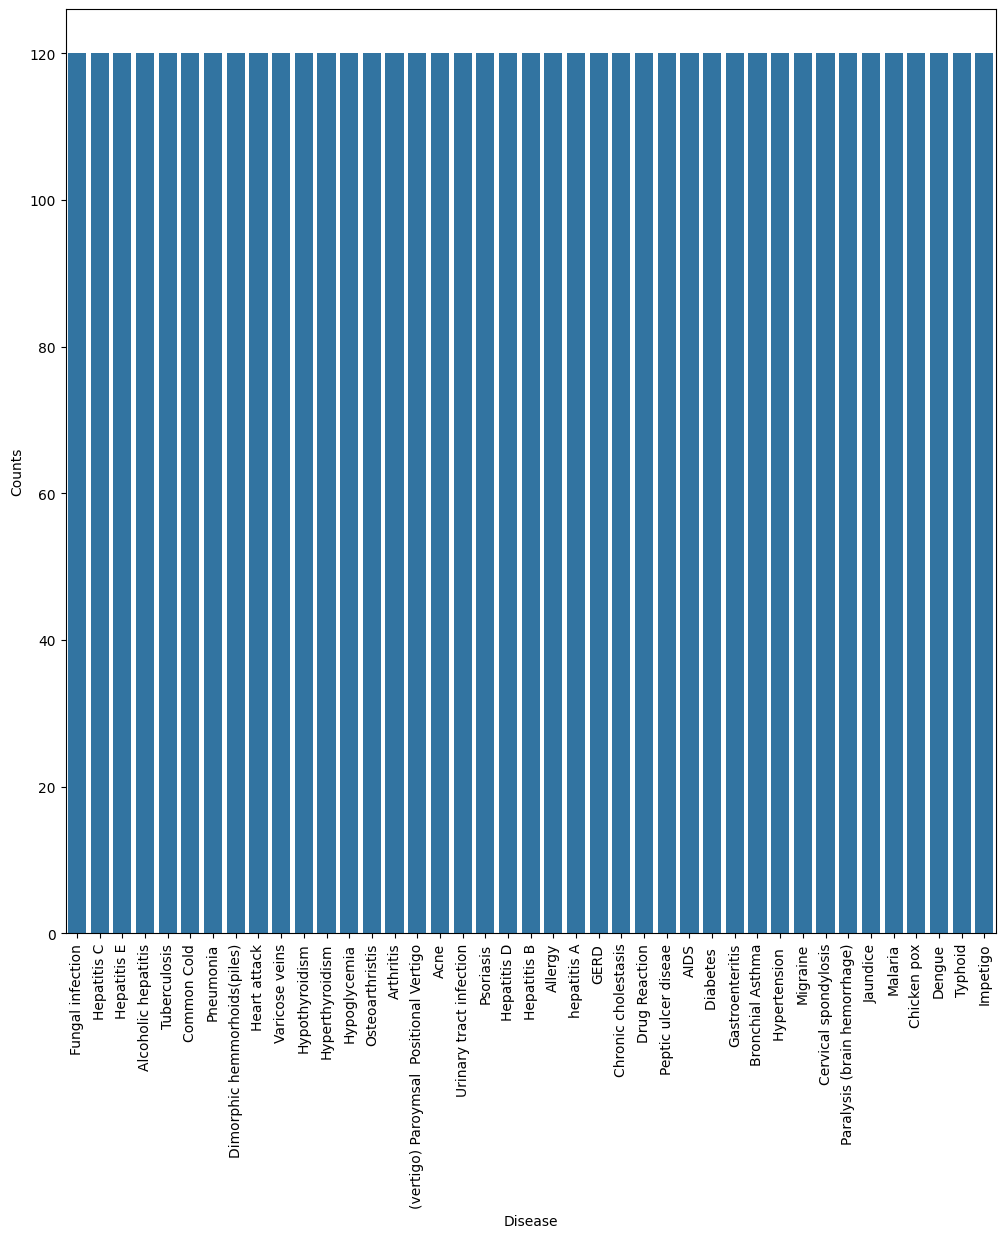

In [56]:
import seaborn as sns
# first check wthether dataset is balanced or not
disease_counts = dataset['prognosis'].value_counts()

temp_df = pd.DataFrame({
    'Disease':disease_counts.index,
    'Counts':disease_counts.values
})

plt.figure(figsize=(12,12))
sns.barplot(x='Disease',y = 'Counts', data = temp_df)
plt.xticks(rotation=90)
plt.show()

- for the above barplot shows all are balanced dataset
- last column is object type, so we have to encode the last object column for proceed further

In [57]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

dataset['prognosis'] = encoder.fit_transform(dataset['prognosis'])

### Split the dataset into features and target

In [58]:
X = dataset.iloc[:,:-1]
y = dataset.iloc[:,-1]

### Split the dataset into train set and test set

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [60]:
X_train.shape, y_train.shape

((3936, 132), (3936,))

In [61]:
X_test.shape, y_test.shape

((984, 132), (984,))

### Model Building

- Here we using K-Fold Cross Validation, Support Vector Classifier, Gaussian Naive Bayes Classifier, Random Forest Classifier
- Before making the model lets use k-fold cross validation for model selection

#### K-Fold Cross Validation for Model Selection

In [62]:
# defining scoring metric for k-fold cross validation

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

def cv_scoring(estimator, X, y):
    return accuracy_score(y, estimator.predict(X))

# Initializing the models

models = {
    'SVC' : SVC(),
    'Gaussian NB' : GaussianNB(),
    'Random Forest' : RandomForestClassifier()
}

# Producing the cross validation scores for the models

for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, y, cv=10, n_jobs=-1, scoring = cv_scoring)
    #  n_jobs=-1=> It enables parallel execution of the cross-validation folds, potentially significantly speeding up the overall process


    print('-*-'*30)
    print(model_name)
    print(f"Scores : {scores}")
    print(f"Mean Score : {np.mean(scores)}")



-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
SVC
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Gaussian NB
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0
-*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*--*-
Random Forest
Scores : [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean Score : 1.0


- above k fold cross validations results, all are machine learning algorithms are getting good accuracy
- we can see that mean value about scores are same for 10 fold.
- to bulid a robust model we have to combine all three models of predictions.
- so that even one model get predict wrong other two models will get good prediction results
- this approach will give to us great accracy while we predicting the values.
- below code we checking the quality of predictions.

#### Building the robust classifier by combining all models

Accuracy on the train data by using SVM model 100.0
Accuracy on the test data by using SVM model 100.0


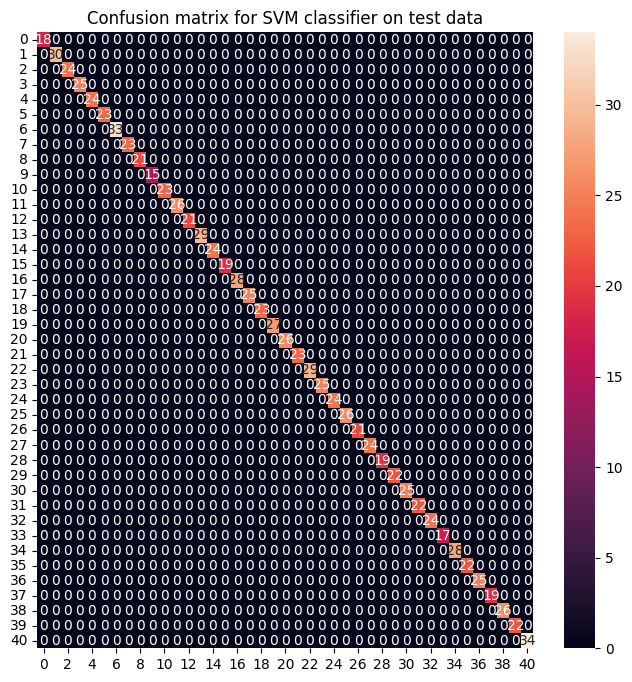

In [63]:
# training and testing the SVM classifier

svm_model = SVC()
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_test)

print(f"Accuracy on the train data by using SVM model {accuracy_score(y_train, svm_model.predict(X_train)) * 100}")

print(f"Accuracy on the test data by using SVM model {accuracy_score(y_test, y_pred) * 100}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (8,8))
sns.heatmap(cm, annot = True)
plt.title('Confusion matrix for SVM classifier on test data')
plt.show()


Accuracy on the train data by using SVM classifier : 100.0
Accuracy on the test data by using SVM classifier : 100.0


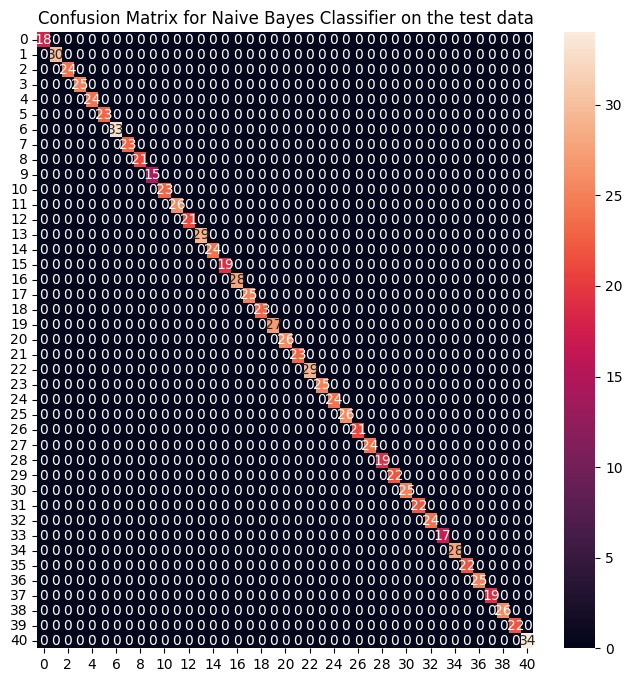

In [64]:
# training and testing the naive bayes classifier

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)
y_test = naive_bayes.predict(X_test)

print(f'Accuracy on the train data by using SVM classifier : {accuracy_score(y_train, naive_bayes.predict(X_train)) * 100}')

print(f"Accuracy on the test data by using SVM classifier : {accuracy_score(y_test, y_pred) * 100}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix for Naive Bayes Classifier on the test data')
plt.show()

Accuracy on the train data by using RFC : 100.0
Accuracy on the test data by using RFC : 100.0


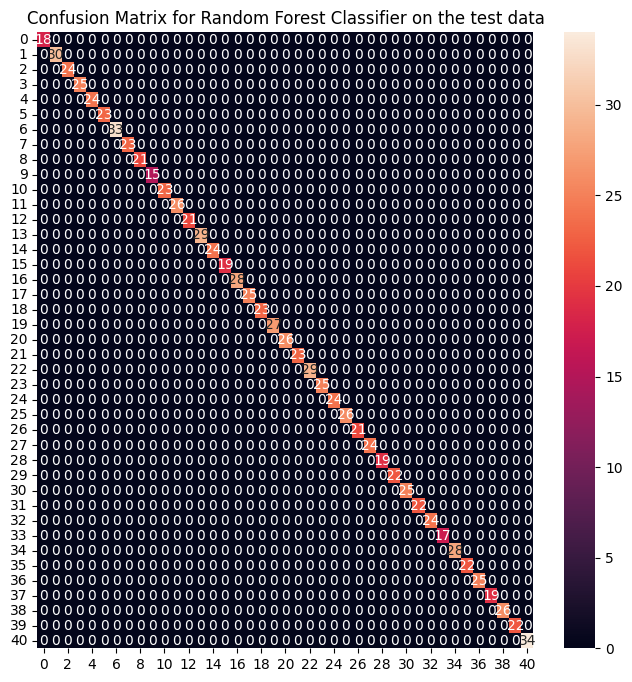

In [65]:
# training and testing data by using random forest classifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

print(f"Accuracy on the train data by using RFC : {accuracy_score(y_train, rfc.predict(X_train)) * 100}")
print(f"Accuracy on the test data by using RFC : {accuracy_score(y_test, y_pred) * 100}")

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix for Random Forest Classifier on the test data')
plt.show()


above obeservation results: 
- for above confusion matrices, we can see that model performing very well on the unseen data,
- now we will training the whole train data in present in dataset,
- now we have test data, so we have to test this data to model.

#### Fitting the model with whole data and validating the test data

In [66]:
# training the model with whole dataset

final_svm_model = SVC()
final_nb_model = GaussianNB()
final_rf_model = RandomForestClassifier(random_state=18)

final_svm_model.fit(X, y)
final_nb_model.fit(X, y)
final_rf_model.fit(X, y)

RandomForestClassifier(random_state=18)

In [67]:
# import the test data 
test_data = pd.read_csv(r'C:\Users\jagan\Documents\ML\datasets\3. disease prediction\Testing.csv').dropna(axis=1)

test_X = test_data.iloc[:,:-1].values
test_y = encoder.transform(test_data.iloc[:,-1].values)

In [68]:
# making the prediction by taking the mode of prediction
# made of all classifiers
from scipy.stats import mode

svm_preds = final_svm_model.predict(test_X)
nb_preds = final_nb_model.predict(test_X)
rf_preds = final_rf_model.predict(test_X)

final_preds = [mode([i,j,k])[0][0]for i, j, k in zip(svm_preds, nb_preds, rf_preds)]

print(f'Accuracy of the test dataset by combined all model {accuracy_score(test_y, final_preds) * 100}')

Accuracy of the test dataset by combined all model 100.0


c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\jagan\AppData\Local\Temp\ipykernel_37320\2149975058.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

In [69]:
print(final_preds)

[15, 4, 16, 9, 14, 33, 1, 12, 17, 6, 23, 30, 7, 32, 28, 29, 8, 11, 37, 40, 19, 20, 21, 22, 3, 36, 10, 34, 13, 18, 39, 26, 24, 25, 31, 5, 0, 2, 38, 35, 27, 15]


In [70]:
for i, j, k in zip(svm_preds, nb_preds, rf_preds):
    print(i, j , k)
    # print('-/-'*8)

15 15 15
4 4 4
16 16 16
9 9 9
14 14 14
33 33 33
1 1 1
12 12 12
17 17 17
6 6 6
23 23 23
30 30 30
7 7 7
32 32 32
28 28 28
29 29 29
8 8 8
11 11 11
37 37 37
40 40 40
19 19 19
20 20 20
21 21 21
22 22 22
3 3 3
36 36 36
10 10 10
34 34 34
13 13 13
18 18 18
39 39 39
26 26 26
24 24 24
25 25 25
31 31 31
5 5 5
0 0 0
2 2 2
38 38 38
35 35 35
27 27 27
15 15 8


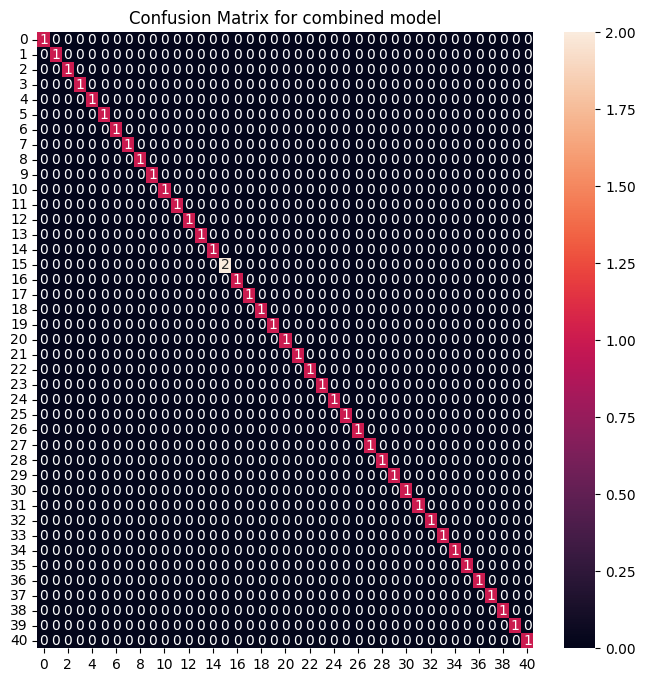

In [71]:
# confusion matrix for combined model

cm = confusion_matrix(test_y, final_preds)

plt.figure(figsize=(8,8))
sns.heatmap(cm, annot = True)
plt.title('Confusion Matrix for combined model')
plt.show()

above observation results
- we can see that our combined model getting great accuracy in all data points.
  
we came now final part of our implementation
- we creating function that takes of symptoms as inputs by comma separated value.
- output the predicted disease by using combined model based on input symptoms

### Creating the function that take symptoms as input and predict the disease 

In [72]:
 print(list(X.columns.values))

['itching', 'skin_rash', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'chills', 'joint_pain', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'vomiting', 'burning_micturition', 'spotting_ urination', 'fatigue', 'weight_gain', 'anxiety', 'cold_hands_and_feets', 'mood_swings', 'weight_loss', 'restlessness', 'lethargy', 'patches_in_throat', 'irregular_sugar_level', 'cough', 'high_fever', 'sunken_eyes', 'breathlessness', 'sweating', 'dehydration', 'indigestion', 'headache', 'yellowish_skin', 'dark_urine', 'nausea', 'loss_of_appetite', 'pain_behind_the_eyes', 'back_pain', 'constipation', 'abdominal_pain', 'diarrhoea', 'mild_fever', 'yellow_urine', 'yellowing_of_eyes', 'acute_liver_failure', 'fluid_overload', 'swelling_of_stomach', 'swelled_lymph_nodes', 'malaise', 'blurred_and_distorted_vision', 'phlegm', 'throat_irritation', 'redness_of_eyes', 'sinus_pressure', 'runny_nose', 'congestion', 'chest_pain', 'weakness_in_limbs', 'fast_heart_rate', 'pain_during_bow

In [73]:
symptoms = X.columns.values

# creating symptom index dictionary to encode the input symptoms to numerical value

symptom_index = {}


for index, value in enumerate(symptoms):
    symptom = " ".join([i.capitalize() for i in value.split('_')])
    symptom_index[symptom] = index

In [74]:
symptom_index

{'Itching': 0,
 'Skin Rash': 1,
 'Nodal Skin Eruptions': 2,
 'Continuous Sneezing': 3,
 'Shivering': 4,
 'Chills': 5,
 'Joint Pain': 6,
 'Stomach Pain': 7,
 'Acidity': 8,
 'Ulcers On Tongue': 9,
 'Muscle Wasting': 10,
 'Vomiting': 11,
 'Burning Micturition': 12,
 'Spotting  urination': 13,
 'Fatigue': 14,
 'Weight Gain': 15,
 'Anxiety': 16,
 'Cold Hands And Feets': 17,
 'Mood Swings': 18,
 'Weight Loss': 19,
 'Restlessness': 20,
 'Lethargy': 21,
 'Patches In Throat': 22,
 'Irregular Sugar Level': 23,
 'Cough': 24,
 'High Fever': 25,
 'Sunken Eyes': 26,
 'Breathlessness': 27,
 'Sweating': 28,
 'Dehydration': 29,
 'Indigestion': 30,
 'Headache': 31,
 'Yellowish Skin': 32,
 'Dark Urine': 33,
 'Nausea': 34,
 'Loss Of Appetite': 35,
 'Pain Behind The Eyes': 36,
 'Back Pain': 37,
 'Constipation': 38,
 'Abdominal Pain': 39,
 'Diarrhoea': 40,
 'Mild Fever': 41,
 'Yellow Urine': 42,
 'Yellowing Of Eyes': 43,
 'Acute Liver Failure': 44,
 'Fluid Overload': 45,
 'Swelling Of Stomach': 46,
 'Swelle

In [75]:
data_dict = {
    'symptom_index' : symptom_index,
    'predictions_classes' : encoder.classes_
}

In [76]:
encoder.classes_

array(['(vertigo) Paroymsal  Positional Vertigo', 'AIDS', 'Acne',
       'Alcoholic hepatitis', 'Allergy', 'Arthritis', 'Bronchial Asthma',
       'Cervical spondylosis', 'Chicken pox', 'Chronic cholestasis',
       'Common Cold', 'Dengue', 'Diabetes ',
       'Dimorphic hemmorhoids(piles)', 'Drug Reaction',
       'Fungal infection', 'GERD', 'Gastroenteritis', 'Heart attack',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Hypertension ', 'Hyperthyroidism', 'Hypoglycemia',
       'Hypothyroidism', 'Impetigo', 'Jaundice', 'Malaria', 'Migraine',
       'Osteoarthristis', 'Paralysis (brain hemorrhage)',
       'Peptic ulcer diseae', 'Pneumonia', 'Psoriasis', 'Tuberculosis',
       'Typhoid', 'Urinary tract infection', 'Varicose veins',
       'hepatitis A'], dtype=object)

In [84]:
data_dict['symptom_index']['Nodal Skin Eruptions']

2

In [92]:
# defining the function

def predictDisease(symptoms):
    symptoms = symptoms.split(',')
    
    # creating the input data to the models
    input_data = [0] * len(data_dict['symptom_index'])
    for symptom in symptoms:
        index = data_dict['symptom_index'][symptom]
        input_data[index] = 1

    # reshaping the input data and converting it 
    input_data = np.array(input_data).reshape(1,-1)

    # generating the invidual outputs
    rf_prediction = data_dict['predictions_classes'][final_rf_model.predict(input_data)[0]]
    nb_prediction = data_dict['predictions_classes'][final_nb_model.predict(input_data)[0]]
    svm_prediction = data_dict['predictions_classes'][final_svm_model.predict(input_data)[0]]

    # making the final predictions by using mode of all predictions
    final_prediction = mode([rf_prediction, nb_prediction, svm_prediction])[0][0]

    predictions = {
        'rf_model_prediction' : rf_prediction,
        'nb_model_prediction' : nb_prediction,
        'svm_model_prediction' : svm_prediction,
        'final_prediction' : final_prediction
    }
    return predictions

result = predictDisease('Itching,Skin Rash,Nodal Skin Eruptions')
result

c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
c:\users\jagan\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\jagan\AppData\Local\Temp\ipykernel_37320\804656699.py:21: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and

{'rf_model_prediction': 'Fungal infection',
 'nb_model_prediction': 'Fungal infection',
 'svm_model_prediction': 'Fungal infection',
 'final_prediction': 'Fungal infection'}